# 1. Environment Setup

In [1]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"        # default location for the drive
print(ROOT)                    # print content of ROOT (Optional)

drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

In [3]:
ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/cs4650/project"

import os
os.chdir(ROOT_DIR)

### Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 2. Data at a Glance

In [5]:
data = pd.read_csv("data/data_all.csv")
data.head()

,id,keyword,location,text,label
0,0,attacked,India,"Largscale violence in #Bhainsa, dist Nirmal of...",0
1,1,trouble,NaN,Hi there. I'm sorry to hear that you are havin...,1
2,2,derail,NaN,Design of AR-15 could derail charges tied to p...,0
3,3,emergency,The Void,I've never posed in the office block coz whene...,0
4,4,hostages,NaN,“We are not citizens. We never were. We are ca...,0


In [6]:
print("Number of data:", len(data))

Number of data: 18724


In [27]:
data.iloc[23]["text"], data.iloc[23]["label"]

('#SSOT We been crying 4 innocent citizens who r being subjected 2 careless leakage. Careless oil companies look at ur work. Thi…',
 1)

### Data Completeness

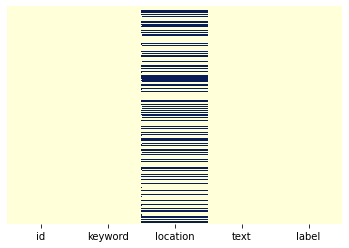

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")
plt.show()

Each dark line indicates there is a missing value. For the disaster tweets dataset, keyword and location fields have missing values. Location seems to have most values lost. For most NLP models, we will be using only the text and the label, so there is little need to handle missing values.

### Label Distribution

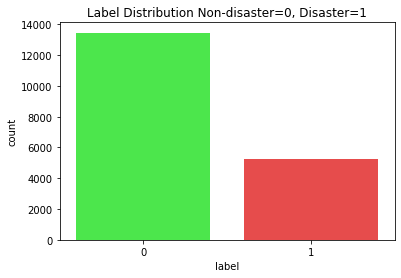

Number of non-disasters: 13454
Number of disasters    : 5270


In [8]:
sns.countplot(x = 'label', data=data, palette=["#33ff33", "#ff3333"])
plt.title("Label Distribution Non-disaster=0, Disaster=1")
plt.show()
print("Number of non-disasters:", np.count_nonzero(data["label"] == 0))
print("Number of disasters    :", np.count_nonzero(data["label"] == 1))

For classification tasks, we are particularly concerned about the distribution of target values. In general, classifiers will have poor performance if this distribution is highly imbalanced. Here, we see the label distribution is somewhat uneven, but there is no drastic difference, which is a great signal for most classification methods. However, when evaluating the models, we should consider F measures instead of mere accuracies. In addition, we will experiment with different loss functions to deal with class imbalance, too.

# 3. Feature Analysis

### Keyword

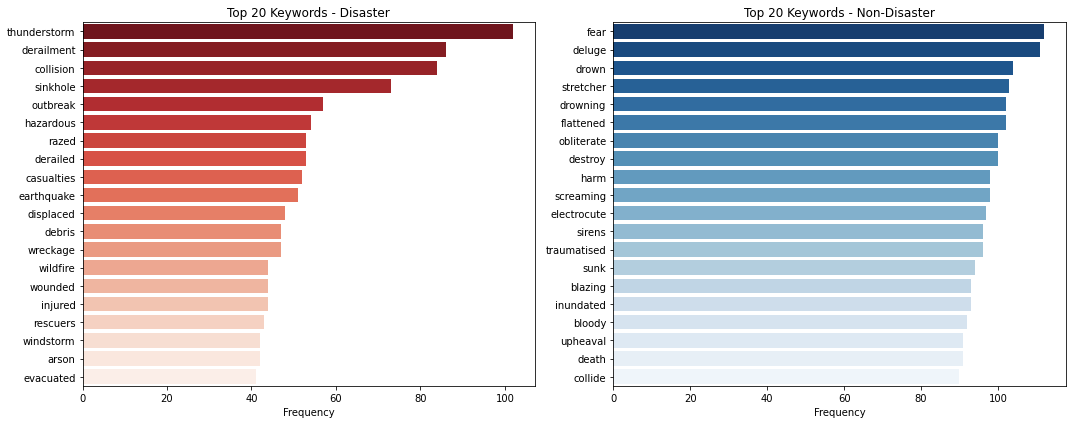

In [9]:
disaster_keywords = data.loc[data["label"] == 1]["keyword"].value_counts()
nondisaster_keywords = data.loc[data["label"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_r")
ax[0].set_title("Top 20 Keywords - Disaster")
ax[0].set_xlabel("Frequency")

sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_r")
ax[1].set_title("Top 20 Keywords - Non-Disaster")
ax[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

It seems that keyword might be a good feature to look at when distinguishing between disaster tweets from non-disaster ones. We may use it as a feature to feed into ML algorithms.

### Location

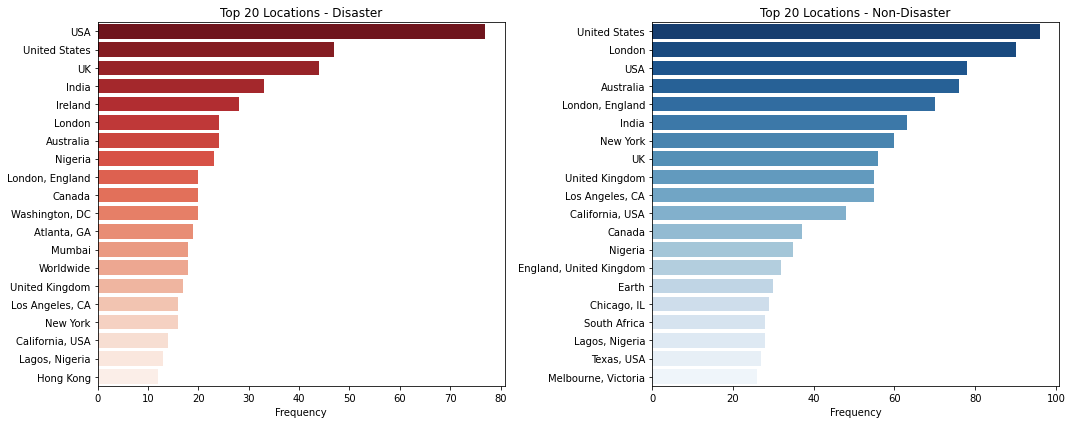

In [10]:
disaster_locations = data.loc[data["label"] == 1]["location"].value_counts()
nondisaster_locations = data.loc[data["label"] == 0]["location"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(y=disaster_locations[0:20].index, x=disaster_locations[0:20], orient='h', ax=ax[0], palette="Reds_r")
ax[0].set_title("Top 20 Locations - Disaster")
ax[0].set_xlabel("Frequency")

sns.barplot(y=nondisaster_locations[0:20].index, x=nondisaster_locations[0:20], orient='h', ax=ax[1], palette="Blues_r")
ax[1].set_title("Top 20 Locations - Non-Disaster")
ax[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

The location distribution is highly skewed. Different values may represent the same location (e.g. New York vs. New York, NY). In addition, some tags may merely be subordinate to other tags (e.g. New York vs. USA). Finally, there is not a clear difference between the top 20 disaster locations and the top 20 non-disaster locations. Overall, the location might not be a good feature for use.

### Text Length

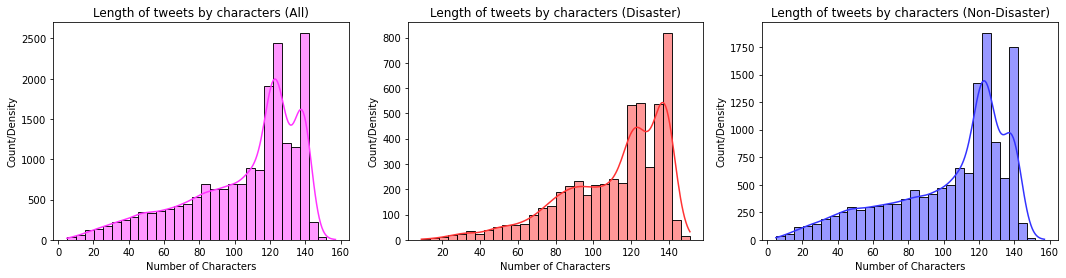

In [11]:
data["length"]  = data["text"].apply(len)

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(data["length"], kde=True, color='#ff33ff', bins=30, ax=ax[0])
ax[0].set_title("Length of tweets by characters (All)")
ax[0].set_xlabel("Number of Characters")
ax[0].set_ylabel("Count/Density")

sns.histplot(data[data["label"] == 1]["length"], kde=True, color='#ff3333', bins=30, ax=ax[1])
ax[1].set_title("Length of tweets by characters (Disaster)")
ax[1].set_xlabel("Number of Characters")
ax[1].set_ylabel("Count/Density")

sns.histplot(data[data["label"] == 0]["length"], kde=True, color='#3333ff', bins=30, ax=ax[2])
ax[2].set_title("Length of tweets by characters (Non-Disaster)")
ax[2].set_xlabel("Number of Characters")
ax[2].set_ylabel("Count/Density")

plt.show()

In [13]:
data["length"].describe()

count    18724.000000
mean       105.072687
std         31.791901
min          5.000000
25%         86.000000
50%        117.000000
75%        128.000000
max        157.000000
Name: length, dtype: float64

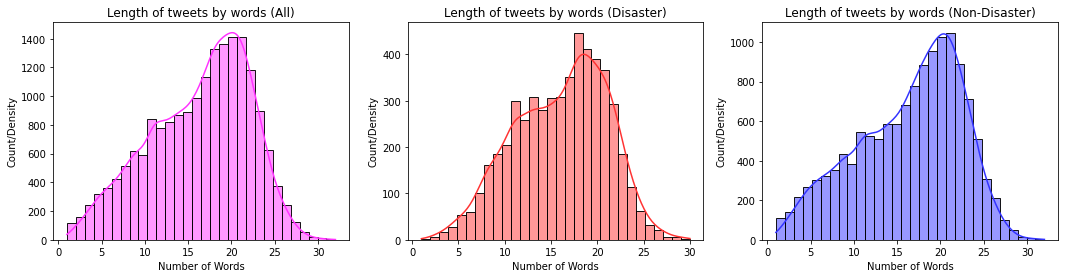

In [14]:
data["num_words"] = data["text"].apply(lambda sentence: len(sentence.split()))

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(data["num_words"],kde=True, color='#ff33ff', bins=30, ax=ax[0])
ax[0].set_title("Length of tweets by words (All)")
ax[0].set_xlabel("Number of Words")
ax[0].set_ylabel("Count/Density")

sns.histplot(data[data["label"] == 1]["num_words"],kde=True, color='#ff3333', bins=30, ax=ax[1])
ax[1].set_title("Length of tweets by words (Disaster)")
ax[1].set_xlabel("Number of Words")
ax[1].set_ylabel("Count/Density")

sns.histplot(data[data["label"] == 0]["num_words"],kde=True, color='#3333ff', bins=30, ax=ax[2])
ax[2].set_title("Length of tweets by words (Non-Disaster)")
ax[2].set_xlabel("Number of Words")
ax[2].set_ylabel("Count/Density")

plt.show()

In [15]:
data["num_words"].describe()

count    18724.000000
mean        16.284555
std          5.707396
min          1.000000
25%         12.000000
50%         17.000000
75%         21.000000
max         32.000000
Name: num_words, dtype: float64

The distributions of tweet lengths both in terms of characters and words are similar between disaster tweets and non-disaster tweets.

We also confirm the fact that these tweets are short, so most NLP classification methods shall work to capture the semantics of this kind of sequence input.